- 本数据集共有大约1200万条数据，数据为淘宝APP2014年11月18日至2014年12月18日的用户行为数据，共6列字段，列字段分别是：
    - user_id：用户身份，脱敏
    - item_id：商品ID，脱敏
    - behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）
    - user_geohash：地理位置
    - item_category：品类ID（商品所属的品类）
    - time：用户行为发生的时间

- 提出问题
    - 不同时间维度下用户活跃度如何变化？
    - 用户的留存情况如何（复购率及漏斗流失情况）？
    - 用户价值情况？
    - 不同商品的销售状况如何？

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 数据预处理

In [2]:
data = pd.read_csv('tianchi_mobile_recommend_train_user.csv')

In [82]:
# 查看重复值数量


In [83]:
# 删除重复值


In [84]:
#查看缺失值


In [85]:
# 缺失值均为地理信息，对用户行为分析无影响，不做处理


In [86]:
#恢复索引


In [87]:
# 将time列拆分为date列和hour列


In [88]:
#将item_id和item_category转换成str


### 用户行为分析（AARRR模型）

#### 活跃度

- 每天活跃度的变化
    - 计算出日访问量，日独立访客量和人均访问量，封装成一个新的df

In [89]:
#日访问量


In [90]:
#日独立访客量


In [91]:
#人均访问量（日访问量/日独立访问量）


- 结论：在12月5日之前，活跃度在一定水平上波动。12月5日后，活跃度开始明显上升，并在双十二当天达到峰值。
- 可能原因：12月5日之后双十二预热活动开始，用户活跃度上升。

- 双十二当天活跃度的变化
    - 选择双十二当天的数据，分析其活跃时间段
        - 双12当天每小时的访问量
        - 双12当天每小时的访客量
        - 双12当天每小时的人均访问量
            - 形成一个新的df

In [92]:
#取出双12当天的数据


In [93]:
#查看双12当天每小时的访问量
#查看双12当天每小时的访客量
#查看双12当天每小时的人均访问量


- 结论：双十二当天0点和18点之后淘宝用户活跃度较高，6点跌至最低点。
- 建议：商家可以在18点后设置优惠券或采取其他促销手段，吸引更多人消费，提高购买率。

- 不同用户行为下的活跃度变化
    - 查看每天不同行为的各自的总量
        - 提示：源数据中的一行数据表示一个用户的某一个行为的数据
        - 注意：aggfunc的count和size的区别

- 将四种行为的总量绘制在一个坐标系中查看

- 结论：
    - 点击、收藏、加购物车、支付这四种行为均在双十二当天达到顶峰。
    - 只观察支付和收藏，发现双十二当天支付量大于收藏量。
        - 支付量大于收藏量说明很多用户购买了目标之外的商品，可能是受到促销的影响冲动消费，又或者是为了凑单等。


#### 留存率

- 漏斗转化情况
    - 查看不同行为的总量，封装到df中
    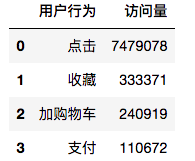
    - 单一环节转化率(%)-各环节转换率作为新的列存在
        - 计算点击到收藏、收藏到加购，加购到支付的转化率
    - 整体转化率(%)-作为新的一列存在
        - 计算点击到收藏、加购和支付的整体转化率
    - 每一环节流失率(%)
        - 100-单一环节转化率

In [94]:
#查看不同行为的访问量，封装到df中


In [96]:
#计算单一环节转换率：点击到收藏、收藏到加购，加购到支付的转化率，作为df新的一列


In [97]:
#计算整体转化率


In [98]:
#计算每一环节流失率(%)


In [55]:
#整体转化率的漏斗转化图
from pyecharts.charts import Funnel
from pyecharts import options as opts
funnel = Funnel().add(
                series_name = '整体转化率(%)',
                data_pair = [ list(z) for z in zip(df['用户行为'],df['整体转化率(%)']) ],
                is_selected = True,
                label_opts = opts.LabelOpts(position = 'inside')
                )
funnel.set_series_opts(tooltip_opts = opts.TooltipOpts(formatter = '{a}<br/>{b}:{c}%'))
funnel.set_global_opts(title_opts = opts.TitleOpts(title = '整体转化率(%)') )
funnel.render_notebook()

- 结论：用户的流失主要发生在点击-收藏环节。

- 可能原因及建议
    - 点击-收藏环节流失
        - 原因：用户被投放的广告吸引，进入后发现与预期严重不合，造成流失。
        - 建议：优化广告。
        - 原因：客户通过检索或推荐到列表页面但没找到合适的产品，造成流失。
        - 建议：更新搜索引擎和相关算法，尽可能精准推送相关内容。
        - 原因：如果商品的评价过低，造成流失。
        - 建议：商家要做进一步调查，分析用户对商品评价低的原因，进一步改进，提升用户的购物体验，最终可以口碑营销。
    - 收藏-加购物车环节流失
        - 此类用户有较强的购买需求。可以对用户进行精准推送促销信息，刺激用户完成购买。
    - 加购物车-支付环节流失
        - 原因：生成订单页面步骤过多。
        - 建议:
            - 优化购物流程，尽可能支持多种支付方式，如银行卡、微信支付、支付宝支付、花呗等。
            - 考虑目前到淘宝的购物流程已经很难再简化，需要商家进一步调查，了解用户放弃支付的原因，方便做出调整。

#### 复购情况分析
- 用户购买次数直方图
- 计算复购率=购买次数大于1的用户数量/有购买行为的用户总数

In [99]:
#用户购买次数直方图（先获取购买商品的行数据）


In [100]:
#计算复购率=购买次数大于1的用户数量/有购买行为的用户总数


- 结论：2014年11月18日至2014年12月18日这一个月用户复购率高达91.45%

### 用户价值分析（RMF模型）
- 对已购用户进行价值划分
- 各类用户占比

In [101]:
#将已购用户的数据单独取出


In [102]:
#计算R：R表示客户最近一次交易时间的间隔
#/np.timedelta64(1,'D')去出days


In [103]:
#计算F：每个用户消费频率


In [64]:
# 交易金额缺失，只考虑最后交易日期和交易频率两个维度

In [66]:
#将各维度分成两个程度
recent_avg = rfm['R'].mean()
freq_avg = rfm['F'].mean()
#R应该是越小越好，则R小于均值返回1，否则返回0
def rec_value(x):
    if x < recent_avg:
        return '1'
    else:
        return '0'
#F应该是越大越好，则F大于均值返回1，否则返回0   
def freq_value(x):
    if x > freq_avg:
        return '1'
    else:
        return '0'
rfm['R_value'] = rfm['R'].apply(rec_value)
rfm['F_value'] = rfm['F'].apply(freq_value)
#将R和F拼接到一起
rfm['rfm']=rfm['R_value'].str.cat(rfm['F_value'])
#根据R和F的拼接判定用户等级
def rfm_value(x):
    if x == '10':#购买间隔短，但是购买频率低
        return '重要发展客户'
    elif x == '01':#购买间隔长，但是购买频率高
        return '重要保持客户'
    elif x == '00':
        return '重要挽留客户'
    else:
        return '重要价值客户'
rfm['user_type'] = rfm['rfm'].apply(rfm_value)
rfm.head()

,R,F,R_value,F_value,rfm,user_type
user_id,,,,,,
4913,2.0,6.0,1,0,10,重要发展客户
6118,1.0,1.0,1,0,10,重要发展客户
7528,5.0,6.0,1,0,10,重要发展客户
7591,5.0,21.0,1,1,11,重要价值客户
12645,4.0,8.0,1,0,10,重要发展客户


In [104]:
#各类用户占比


- 结论
    - 重要挽留客户：占比最大，该类用户消费时间间隔较远，并且消费频次低。需要主动联系客户，调查清楚哪里出现了问题，可以通过短信，邮件，APP推送等唤醒客户，尽可能减少流失。
    - 重要发展客户：消费频次低，可以适当给点折扣或捆绑销售来增加用户的购买频率，尽可能提高留存率。
    - 重要价值客户：为重点用户，但用户比较少。可以针对性地给这类客户提供 VIP服务；
    - 重要保持客户：消费时间间隔较远，但是消费频次高。该类用户可能一次性购买很多东西。对于这类客户，需要主动联系，关注他们的购物习性做精准化营销，及时满足这类用户的需求。
